# SECTION 1: DECLARE THE MODULES

In [ ]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

import warnings
warnings.filterwarnings('ignore')




# SECTION 2: Data import and preprocess
#Run this but dont worry if it does not make any sense Jump to SECTION 3 that is related to your HD task.

In [ ]:
!pip install wget
import wget

link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data)

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=b75c732a61e668a467c949d0540c637c6a9149caadaf71b5461847f769555aca
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
DataSet

'training_attack_types.txt'

In [ ]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names
# file, but it is supposed to be a binary feature according to the
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [ ]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [ ]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [ ]:
#Processing Training Data

train_file= 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'


train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)






In [ ]:
#Processing test Data
test_file= 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'
test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

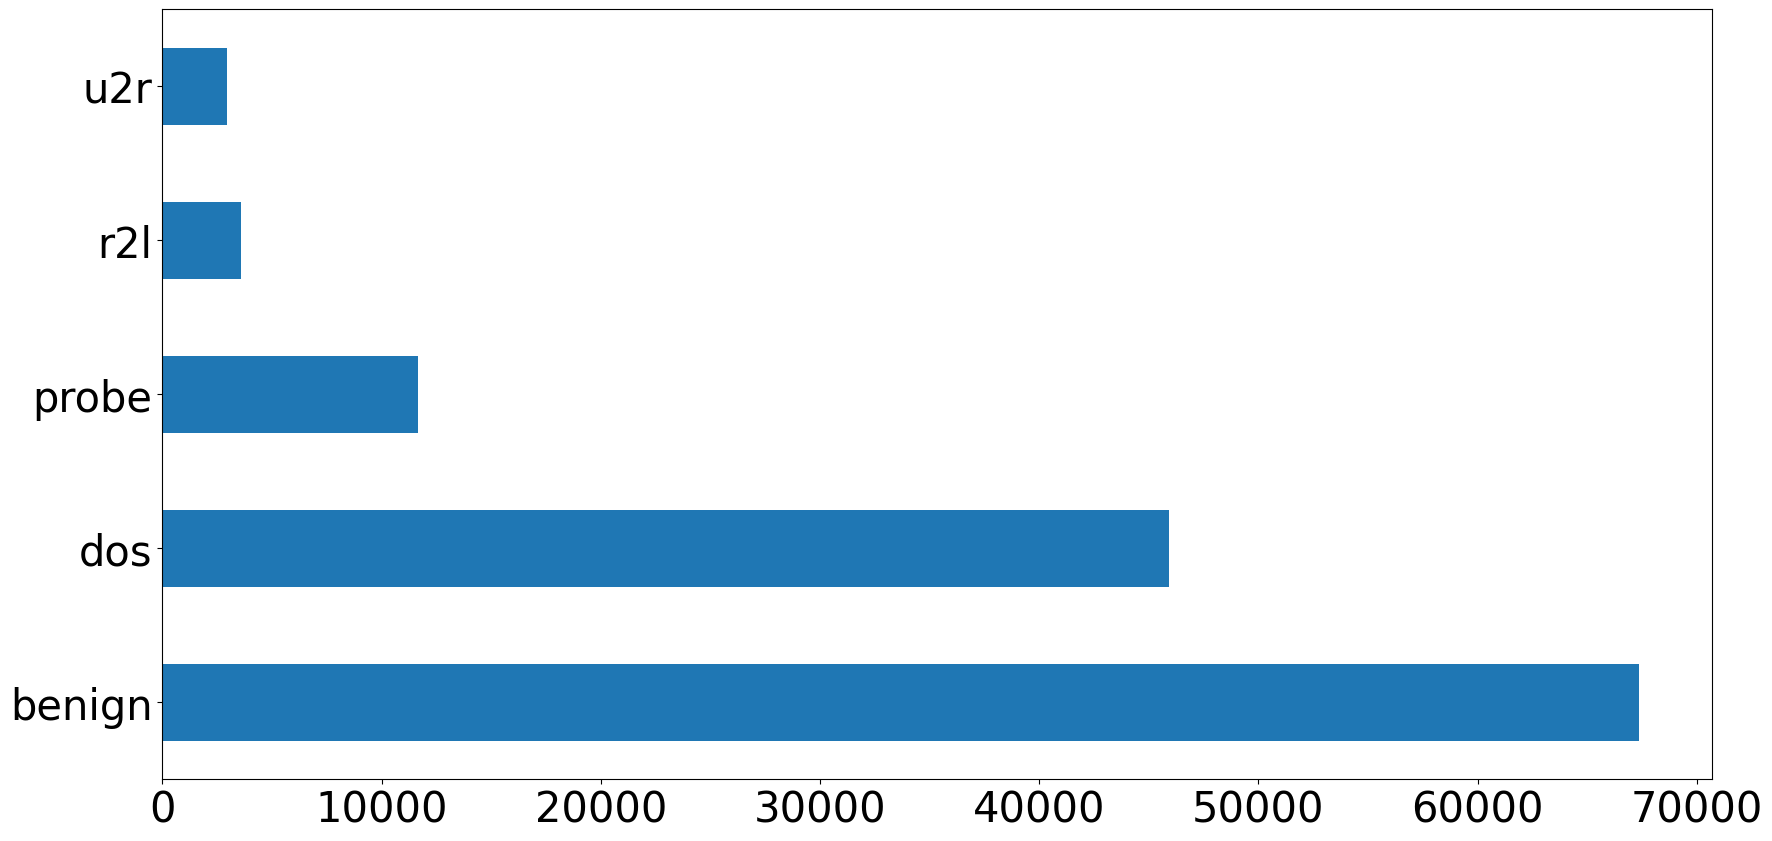

In [ ]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# SECTION 3: Multi class classification
#This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [ ]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)


[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


**Building 5 classification Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

**Building a Logistic Regression Model**

In [ ]:
log = LogisticRegression()

In [ ]:
# Function to create a Classifier Model, It takes five parameters and returns the accuracy of the model for further analysis
# Parameters:
# clf: The type of the algoritm you want to use to train the Model
# x_train: The independent variables training subset
# x_test: The independent variables test or validation subset
# y_train: The target variables training subset
# model_name: The name of the Model

def model(clf, x_train, x_test, y_train, y_test, model_name):
    start= timeit.default_timer()
    #Train the model using the training sets
    clf.fit(x_train,y_train)
    #Calculate Stop time
    stop= timeit.default_timer()
    train_time= stop - start

    #Calculate start time
    start_test = timeit.default_timer()
    # Predict the model
    pred=clf.predict(x_test)
    #Calculate Stop time
    stop = timeit.default_timer()
    test_time= stop - start

    # Model Accuracy: how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, pred)
    print("Accuracy:",accuracy)
    # kappa
    print("Cohens kappa:", metrics.cohen_kappa_score(y_test, pred))
    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, pred, average = 'macro'))
    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(y_test, pred, average = 'macro'))
    #Calculate F1 Score
    print("F1 Score:",metrics.f1_score(y_test, pred, average = 'macro'))
    error = zero_one_loss(test_Y, pred)
    print("Zero_one_loss", error)

    #Train time
    print('Train Time(s): ',train_time)
    #Test time
    print('Test Time(s): ',test_time)

    print('                                               ')
    print('-------------Confusion Matrix------------------')

    # Getting the confusion matrix
    matrix = confusion_matrix(y_test, pred)
    print(matrix)
    #Visualising the confusion matrix
    sns.heatmap(matrix, annot = True, cbar = False, cmap = 'Blues', xticklabels= train_Y.unique(), yticklabels = train_Y.unique())
    plt.title("Confusion Matrix for the {} model".format(model_name))
    plt.show()

    print('                                               ')
    print('-------------Classification Report--------------------')

    #obtaining a classification report of the model
    print(classification_report(y_test, pred))
    return accuracy


Accuracy: 0.7530606813342796
Cohens kappa: 0.6092438644193573
Precision: 0.8141604993873506
Recall: 0.5100569661036316
F1 Score: 0.5070502281065372
Zero_one_loss 0.2469393186657204
Train Time(s):  9.156531143999928
Test Time(s):  9.176525677999962
                                               
-------------Confusion Matrix------------------
[[8993   90  624    2    2]
 [1560 6052   24    0    0]
 [ 496   99 1825    3    0]
 [2471    2    2   99    0]
 [ 184    3    0    5    8]]


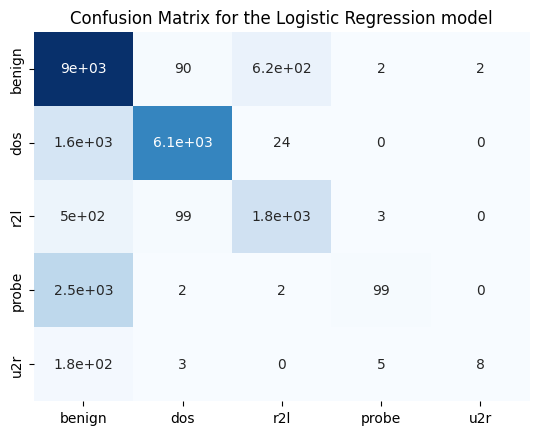

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

      benign       0.66      0.93      0.77      9711
         dos       0.97      0.79      0.87      7636
       probe       0.74      0.75      0.75      2423
         r2l       0.91      0.04      0.07      2574
         u2r       0.80      0.04      0.08       200

    accuracy                           0.75     22544
   macro avg       0.81      0.51      0.51     22544
weighted avg       0.80      0.75      0.72     22544



In [ ]:
log_model= model(log, train_x, test_x, train_Y, test_Y, "Logistic Regression")

**Building a K Nearest Neighbour Model**

In [ ]:
knn = KNeighborsClassifier()

Accuracy: 0.7619322214336409
Cohens kappa: 0.6193377178114488
Precision: 0.8601556370245385
Recall: 0.5063574671667119
F1 Score: 0.5196654360220211
Zero_one_loss 0.23806777856635908
Train Time(s):  0.3833095339996362
Test Time(s):  26.229960093000045
                                               
-------------Confusion Matrix------------------
[[9444   54  207    5    1]
 [1630 5925   81    0    0]
 [ 614  180 1629    0    0]
 [2362    2   40  170    0]
 [ 170    0   17    4    9]]


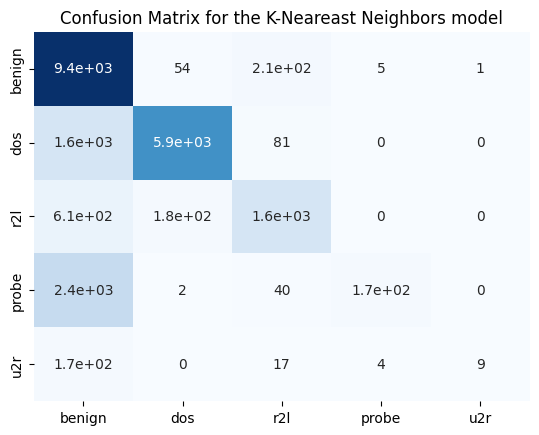

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

      benign       0.66      0.97      0.79      9711
         dos       0.96      0.78      0.86      7636
       probe       0.83      0.67      0.74      2423
         r2l       0.95      0.07      0.12      2574
         u2r       0.90      0.04      0.09       200

    accuracy                           0.76     22544
   macro avg       0.86      0.51      0.52     22544
weighted avg       0.82      0.76      0.73     22544



In [ ]:
# Building a k nearest neighbor model using our already built function
knn_model = model(knn, train_x, test_x, train_Y, test_Y, "K-Neareast Neighbors")

**Building an Adaptive Boostuing Model**

In [ ]:
# Instantiating the adaboost algorithm
ada = AdaBoostClassifier()

Accuracy: 0.4587029808374734
Cohens kappa: 0.15819695068658257
Precision: 0.3924245999223914
Recall: 0.2873513784411104
F1 Score: 0.2729991994433394
Zero_one_loss 0.5412970191625266
Train Time(s):  16.86721501000011
Test Time(s):  17.15537734500049
                                               
-------------Confusion Matrix------------------
[[4507 5098   73   33    0]
 [1407 5108 1121    0    0]
 [1217  502  704    0    0]
 [2194  329   28   21    2]
 [ 179    0   10   10    1]]


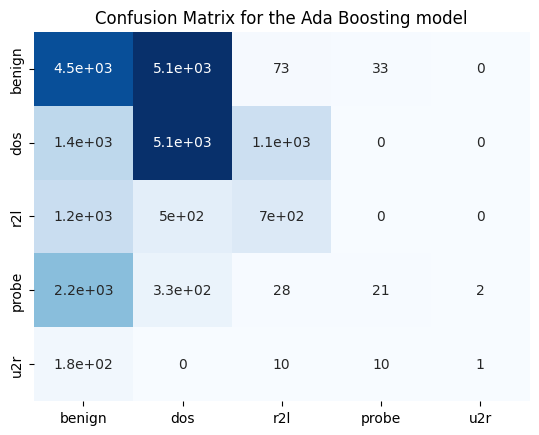

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

      benign       0.47      0.46      0.47      9711
         dos       0.46      0.67      0.55      7636
       probe       0.36      0.29      0.32      2423
         r2l       0.33      0.01      0.02      2574
         u2r       0.33      0.01      0.01       200

    accuracy                           0.46     22544
   macro avg       0.39      0.29      0.27     22544
weighted avg       0.44      0.46      0.42     22544



In [ ]:
# Building a Ada Boost model using our already built function
ada_model = model(ada, train_x, test_x, train_Y, test_Y, "Ada Boosting")

**Building a Gradient Boosting Model**

In [ ]:
# Instantiating the gradient boosting algorithm
gdb = GradientBoostingClassifier()

Accuracy: 0.7695173882185947
Cohens kappa: 0.6336425959080781
Precision: 0.7426647324215279
Recall: 0.5171169899562781
F1 Score: 0.539426828250754
Zero_one_loss 0.23048261178140528
Train Time(s):  181.85002878900013
Test Time(s):  182.01633212600063
                                               
-------------Confusion Matrix------------------
[[9425   73  207    3    3]
 [1609 5994   33    0    0]
 [ 473  106 1617  227    0]
 [2264    0    5  303    2]
 [ 175    0    6   10    9]]


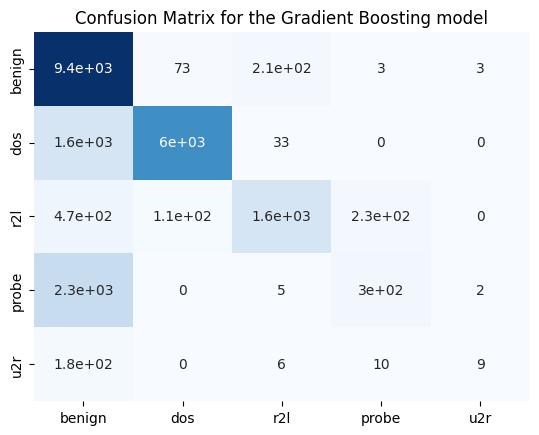

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

      benign       0.68      0.97      0.80      9711
         dos       0.97      0.78      0.87      7636
       probe       0.87      0.67      0.75      2423
         r2l       0.56      0.12      0.19      2574
         u2r       0.64      0.04      0.08       200

    accuracy                           0.77     22544
   macro avg       0.74      0.52      0.54     22544
weighted avg       0.78      0.77      0.74     22544



In [ ]:
# Building a Gradient Boosting model using our already built function
gdb_model = model(gdb, train_x, test_x, train_Y, test_Y, "Gradient Boosting")

**Building a XGboost Classifier**




The xgboost algorithm doesnt take nominal values as target variables, so we convert them into ordinal values for the xgb model.

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
xgb_y_train= label_encoder.fit_transform(train_Y)

xgb_y_test= label_encoder.transform(test_Y)

In [ ]:
xgb = XGBClassifier()

Accuracy: 0.7708924769339958
Cohens kappa: 0.6332594167697113
Precision: 0.8326646257674684
Recall: 0.5050035477692599
F1 Score: 0.5201246150851562
Zero_one_loss 1.0
Train Time(s):  304.2408522159967
Test Time(s):  304.493514046997
                                               
-------------Confusion Matrix------------------
[[9436   69  204    1    1]
 [1321 6219   96    0    0]
 [ 736  165 1522    0    0]
 [2375    0    2  195    2]
 [ 191    0    2    0    7]]


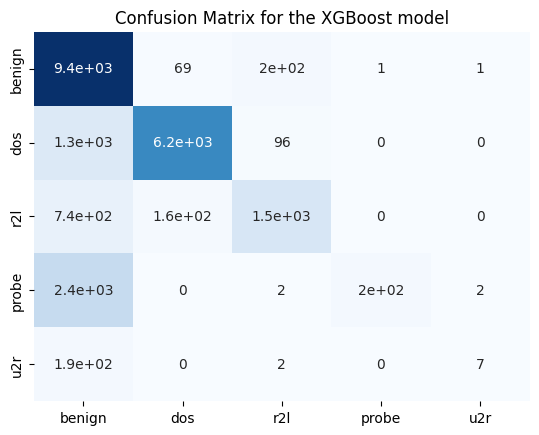

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.96      0.81      0.88      7636
           2       0.83      0.63      0.72      2423
           3       0.99      0.08      0.14      2574
           4       0.70      0.04      0.07       200

    accuracy                           0.77     22544
   macro avg       0.83      0.51      0.52     22544
weighted avg       0.82      0.77      0.73     22544



In [ ]:
# Building a XGBoost model using our already built function
xgb_model = model(xgb, train_x, test_x, xgb_y_train, xgb_y_test, "XGBoost")

**Hyperparameter Tuning**

In this section, all trained models will be fine tuned to achieve better evaluation metrics.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

Fine tuning the logistic Regression Model

In [ ]:
max_iter = [100]
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.1)
# Creating a dictionary of parameters for the randomizedsearchcv algorithm to iterate over
random_grid ={
'max_iter' : max_iter,
'warm_start' : warm_start,
'solver' : solver,
'C' : C,
}
random_estimator_log = RandomizedSearchCV(estimator = log,
param_distributions = random_grid,
n_iter = 5,
scoring = 'accuracy',
n_jobs = -1,
verbose = 1,
random_state = 1,
)

In [ ]:
# Conducting a randomized search for optimum parameters
random_estimator_log.fit(train_x, train_Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_iter': [100],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear'],
                                        'warm_start': [True, False]},
                   random_state=1, scoring='accuracy', verbose=1)

In [ ]:
#Getting the fine tuned model and retraining it on the train then validating it on the test set using the model function
best_log_estimator = random_estimator_log.best_estimator_


LogisticRegression(C=0.8, solver='newton-cg', warm_start=True)

Accuracy: 0.7444109297374024
Cohens kappa: 0.5927942562862998
Precision: 0.7721541116443942
Recall: 0.5003817115974292
F1 Score: 0.5017500323946285
Zero_one_loss 0.2555890702625976
Train Time(s):  0.9974822200001654
Test Time(s):  1.066587093000635
                                               
-------------Confusion Matrix------------------
[[9004  306  397    2    2]
 [1660 5963   13    0    0]
 [ 537  106 1758   22    0]
 [2523    3    1   47    0]
 [ 183    4    0    3   10]]


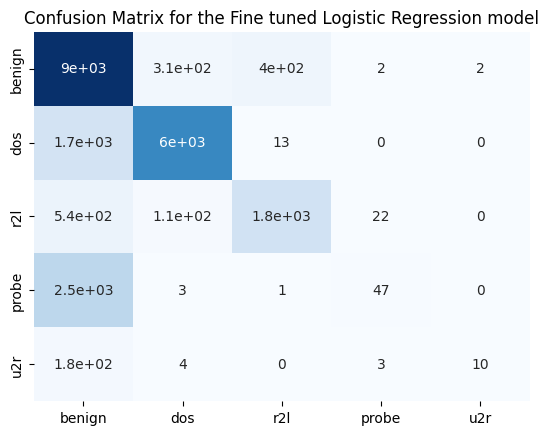

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

      benign       0.65      0.93      0.76      9711
         dos       0.93      0.78      0.85      7636
       probe       0.81      0.73      0.77      2423
         r2l       0.64      0.02      0.04      2574
         u2r       0.83      0.05      0.09       200

    accuracy                           0.74     22544
   macro avg       0.77      0.50      0.50     22544
weighted avg       0.76      0.74      0.70     22544



In [ ]:
# Building the model
log_tuned = model(best_log_estimator, train_x, test_x, train_Y, test_Y, "Fine tuned Logistic Regression")

**Fine Tuning The Ada Boost Model**

In [ ]:
random_grid = {
'n_estimators': np.arange(100,300,100),
'learning_rate': [0.01, 0.05, 0.1, 1],
}
random_estimator_ada = RandomizedSearchCV(estimator = ada,
param_distributions = random_grid,
n_iter = 5,
scoring = 'accuracy',
n_jobs = -1,
verbose = 1,
random_state = 1,
)

In [ ]:
# Conducting a randomized search for optimum parameters
random_estimator_ada.fit(train_x, train_Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 1],
                                        'n_estimators': array([100, 200])},
                   random_state=1, scoring='accuracy', verbose=1)

Accuracy: 0.6589779985805536
Cohens kappa: 0.4352745229856575
Precision: 0.41508117223542573
Recall: 0.3605460821750085
F1 Score: 0.34858765787069357
Zero_one_loss 0.3410220014194464
Train Time(s):  106.72632131800128
Test Time(s):  108.80470262500057
                                               
-------------Confusion Matrix------------------
[[9513  175   23    0    0]
 [2721 4905   10    0    0]
 [ 849 1136  438    0    0]
 [2400    1  173    0    0]
 [ 197    3    0    0    0]]


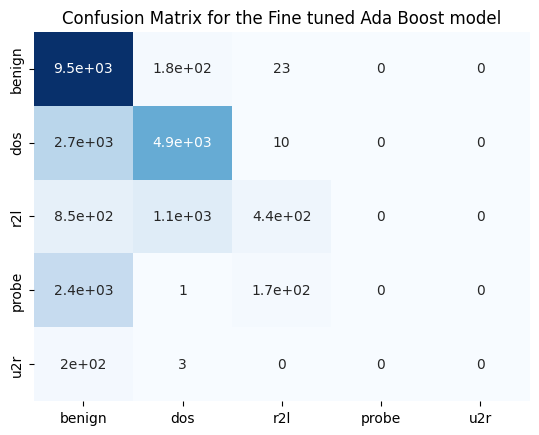

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

      benign       0.61      0.98      0.75      9711
         dos       0.79      0.64      0.71      7636
       probe       0.68      0.18      0.29      2423
         r2l       0.00      0.00      0.00      2574
         u2r       0.00      0.00      0.00       200

    accuracy                           0.66     22544
   macro avg       0.42      0.36      0.35     22544
weighted avg       0.60      0.66      0.59     22544



In [ ]:
#Getting the fine tuned ada boost model and retraining it on the train then validating it on the test set using the model function
best_ada_estimator = random_estimator_ada.best_estimator_
#Building the Model
ada_tuned = model(best_ada_estimator, train_x, test_x, train_Y, test_Y, "Fine tuned Ada Boost")

**Fine Tuning The K-Nearest Neighbors Model**

In [ ]:
random_grid = {
'n_neighbors': range(3,7), 'weights' : ['uniform', 'distance'], \
                    'metric': ['minkowski', 'euclidean']
}
random_estimator_knn = RandomizedSearchCV(estimator = knn,
param_distributions = random_grid,
n_iter = 5,
scoring = 'accuracy',
n_jobs = -1,
verbose = 1,
random_state = 1,
)

In [ ]:
# Conducting a randomized search for optimum parameters
random_estimator_knn.fit(train_x, train_Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean'],
                                        'n_neighbors': range(3, 7),
                                        'weights': ['uniform', 'distance']},
                   random_state=1, scoring='accuracy', verbose=1)

Accuracy: 0.7570085166784953
Cohens kappa: 0.61031930480775
Precision: 0.8369640024781443
Recall: 0.4973326788856604
F1 Score: 0.5102973678938353
Zero_one_loss 0.24299148332150466
Train Time(s):  0.44181068200123264
Test Time(s):  40.71381041300265
                                               
-------------Confusion Matrix------------------
[[9448   55  206    2    0]
 [1646 5921   69    0    0]
 [ 693  179 1551    0    0]
 [2399    2   34  137    2]
 [ 166    0   15   10    9]]


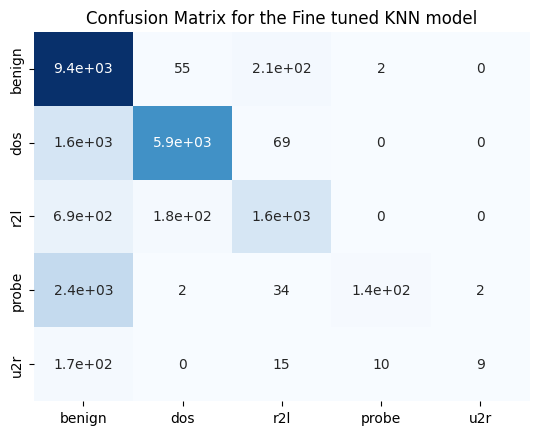

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

      benign       0.66      0.97      0.79      9711
         dos       0.96      0.78      0.86      7636
       probe       0.83      0.64      0.72      2423
         r2l       0.92      0.05      0.10      2574
         u2r       0.82      0.04      0.09       200

    accuracy                           0.76     22544
   macro avg       0.84      0.50      0.51     22544
weighted avg       0.81      0.76      0.72     22544



In [ ]:
#Getting the fine tuned knn boost model and retraining it on the train then validating it on the test set using the model function
best_knn_estimator = random_estimator_knn.best_estimator_
#Building the Model
knn_tuned = model(best_knn_estimator, train_x, test_x, train_Y, test_Y, "Fine tuned KNN")

**Fine Tuning the XGBoost Model**

In [ ]:
random_grid = {
'learning_rate': [0.01,0.05],
'gamma': [0, 0.5 ],
'reg_alpha': [0, 0.5],
'reg_lambda': [0.5, 1],
}
random_estimator_xgb = RandomizedSearchCV(estimator = xgb,
param_distributions = random_grid,
n_iter = 3,
scoring = 'accuracy',
cv = 2,
n_jobs = -1,
verbose = 1,
random_state = 1,
)

In [ ]:
# Conducting a randomized search for optimum parameters
# The label encoded subsets will be used since xgboost does not accept nominal values
random_estimator_xgb.fit(train_x, xgb_y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.5],
                                        'learning_rate': [0.01, 0.05],
                                        'reg_alpha': [0, 0.5],
                                        'reg_lambda': [0.5, 1]},
                   random_state=1, scoring='accuracy', verbose=1)

Accuracy: 0.7702714691270405
Cohens kappa: 0.6328690502534193
Precision: 0.820711374829793
Recall: 0.502842620787392
F1 Score: 0.511099828848492
Zero_one_loss 1.0
Train Time(s):  328.7559229440012
Test Time(s):  329.0540614450001
                                               
-------------Confusion Matrix------------------
[[9434   70  205    1    1]
 [1261 6210  165    0    0]
 [ 691  162 1562    8    0]
 [2416    0    3  154    1]
 [ 193    0    2    0    5]]


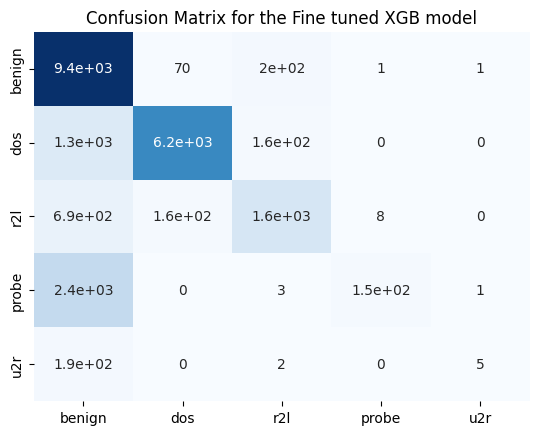

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

           0       0.67      0.97      0.80      9711
           1       0.96      0.81      0.88      7636
           2       0.81      0.64      0.72      2423
           3       0.94      0.06      0.11      2574
           4       0.71      0.03      0.05       200

    accuracy                           0.77     22544
   macro avg       0.82      0.50      0.51     22544
weighted avg       0.82      0.77      0.73     22544



In [ ]:
#Getting the fine tuned knn boost model and retraining it on the train then validating it on the test set using the model function
best_xgb_estimator = random_estimator_xgb.best_estimator_
#Building the Model
xgb_tuned = model(best_xgb_estimator, train_x, test_x, xgb_y_train, xgb_y_test, "Fine tuned XGB")

**Fine Tuning the Gradient Boosting Model**

In [ ]:
random_grid = {
"max_depth":[5,7,9],
"learning_rate":[0.01,0.1,1]
}
random_estimator_gdb = RandomizedSearchCV(estimator = gdb,
param_distributions = random_grid,
n_iter = 3,
scoring = 'accuracy',
n_jobs = -1,
cv = 2,
verbose = 1,
random_state = 1,
)



In [ ]:
random_estimator_gdb.fit(train_x, train_Y)


Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [5, 7, 9]},
                   random_state=1, scoring='accuracy', verbose=1)

Accuracy: 0.7464957416607523
Cohens kappa: 0.5928035364331214
Precision: 0.852289223988941
Recall: 0.5025261930868393
F1 Score: 0.531401782420719
Zero_one_loss 0.2535042583392477
Train Time(s):  657.1976074839986
Test Time(s):  657.7665589749959
                                               
-------------Confusion Matrix------------------
[[9438   67  203    2    1]
 [1846 5681  109    0    0]
 [ 792  161 1470    0    0]
 [2350    1    1  219    3]
 [ 172    5    2    0   21]]


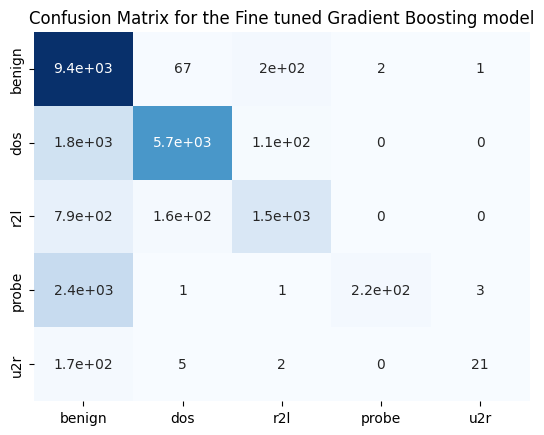

                                               
-------------Classification Report--------------------
              precision    recall  f1-score   support

      benign       0.65      0.97      0.78      9711
         dos       0.96      0.74      0.84      7636
       probe       0.82      0.61      0.70      2423
         r2l       0.99      0.09      0.16      2574
         u2r       0.84      0.10      0.19       200

    accuracy                           0.75     22544
   macro avg       0.85      0.50      0.53     22544
weighted avg       0.81      0.75      0.71     22544



In [ ]:
#Getting the fine tuned knn boost model and retraining it on the train then validating it on the test set using the model function
best_gdb_estimator = random_estimator_gdb.best_estimator_
#Building the Model
gdb_tuned = model(best_gdb_estimator, train_x, test_x, train_Y, test_Y, "Fine tuned Gradient Boosting")

**Comparing Models Performance Before and After Fine tuning**

In [ ]:
comparison_dict = {
    'Model' : ['Logistic_Regression', 'Ada_boost', 'Gradient_Boosting', 'K-Nearest Neighbors', 'XGBoost'],
    'Accuracy Before Tuning' : [log_model, ada_model, gdb_model, knn_model, xgb_model],
    'Accuracy After tuning' : [log_tuned, ada_tuned, gdb_tuned, knn_tuned, xgb_tuned],
}
# Creating a dataframe to compare accuracy
compare_df = pd.DataFrame(comparison_dict)
compare_df

,Model,Accuracy Before Tuning,Accuracy After tuning
0,Logistic_Regression,0.753061,0.744411
1,Ada_boost,0.458703,0.658978
2,Gradient_Boosting,0.769517,0.746496
3,K-Nearest Neighbors,0.761932,0.757009
4,XGBoost,0.770892,0.770271


The tuned model for the ada boost algorithm, was the only model that showed significant improve in accuracy after the hyperparameter tuning. Thus the default for all the other algorithms will be taken as final models for comparison.

**Comparing The Accuracy Of All The chosen Final Models**

In [ ]:
model_dict = {
    'Model' : ['Logistic_Regression_default', 'Ada_boost', 'Gradient_Boosting_default', 'K-Nearest Neighbors_default', 'XGBoost_default'],
    'Accuracy' : [log_model, ada_tuned, gdb_model, knn_model, xgb_model]}
model_df = pd.DataFrame(model_dict)
model_df

,Model,Accuracy
0,Logistic_Regression_default,0.753061
1,Ada_boost,0.658978
2,Gradient_Boosting_default,0.769517
3,K-Nearest Neighbors_default,0.761932
4,XGBoost_default,0.770892


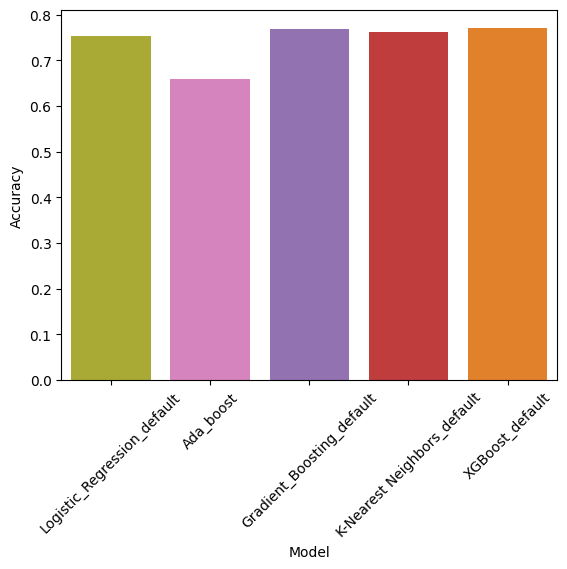

In [ ]:
#Visualizing the table
sns.barplot(data = model_df, x= 'Model', y= 'Accuracy', palette = 'tab10_r')
plt.xticks(rotation = 45)
plt.show()